# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [ ]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [ ]:
print(df_hh_income.isna().values.any())
print(df_pct_poverty.isna().values.any())
print(df_pct_completed_hs.isna().values.any())
print(df_share_race_city.isna().values.any())
print(df_fatalities.isna().values.any())

True
False
False
False
True


In [ ]:
print(df_hh_income.duplicated().values.any())
print(df_pct_poverty.duplicated().values.any())
print(df_pct_completed_hs.duplicated().values.any())
print(df_share_race_city.duplicated().values.any())
print(df_fatalities.duplicated().values.any())

False
False
False
False
False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
df_hh_income.fillna(0, inplace=True)
print(df_hh_income)

      Geographic Area                    City Median Income
0                  AL              Abanda CDP         11207
1                  AL          Abbeville city         25615
2                  AL         Adamsville city         42575
3                  AL            Addison town         37083
4                  AL              Akron town         21667
...               ...                     ...           ...
29317              WY  Woods Landing-Jelm CDP             0
29318              WY            Worland city         41523
29319              WY             Wright town         77114
29320              WY              Yoder town         37500
29321              WY           Y-O Ranch CDP             0

[29322 rows x 3 columns]


In [ ]:
df_fatalities.fillna(0, inplace=True)
print(df_fatalities)

        id                name      date   manner_of_death       armed   age  \
0        3          Tim Elliot  02/01/15              shot         gun 53.00   
1        4    Lewis Lee Lembke  02/01/15              shot         gun 47.00   
2        5  John Paul Quintero  03/01/15  shot and Tasered     unarmed 23.00   
3        8     Matthew Hoffman  04/01/15              shot  toy weapon 32.00   
4        9   Michael Rodriguez  04/01/15              shot    nail gun 39.00   
...    ...                 ...       ...               ...         ...   ...   
2530  2822    Rodney E. Jacobs  28/07/17              shot         gun 31.00   
2531  2813               TK TK  28/07/17              shot     vehicle  0.00   
2532  2818  Dennis W. Robinson  29/07/17              shot         gun 48.00   
2533  2817       Isaiah Tucker  31/07/17              shot     vehicle 28.00   
2534  2815        Dwayne Jeune  31/07/17              shot       knife 32.00   

     gender race           city state  

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].replace("-", 0)

df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])
print(df_pct_poverty.head())

df_pct_poverty_sorted = df_pct_poverty.sort_values("poverty_rate", ascending=False)
print(df_pct_poverty_sorted)

  Geographic Area             City  poverty_rate
0              AL       Abanda CDP         78.80
1              AL   Abbeville city         29.10
2              AL  Adamsville city         25.50
3              AL     Addison town         30.70
4              AL       Akron town         42.00
      Geographic Area                City  poverty_rate
13186              MN       The Ranch CDP        100.00
24999              TX   Eugenio Saenz CDP        100.00
25005              TX       Evergreen CDP        100.00
24687              TX      Box Canyon CDP        100.00
24787              TX      Chaparrito CDP        100.00
...               ...                 ...           ...
636                AK         Chiniak CDP          0.00
13992              MO         Fremont CDP          0.00
9411               KS         Isabel city          0.00
227                AL       Gulfcrest CDP          0.00
27926              WA  Wilderness Rim CDP          0.00

[29329 rows x 3 columns]


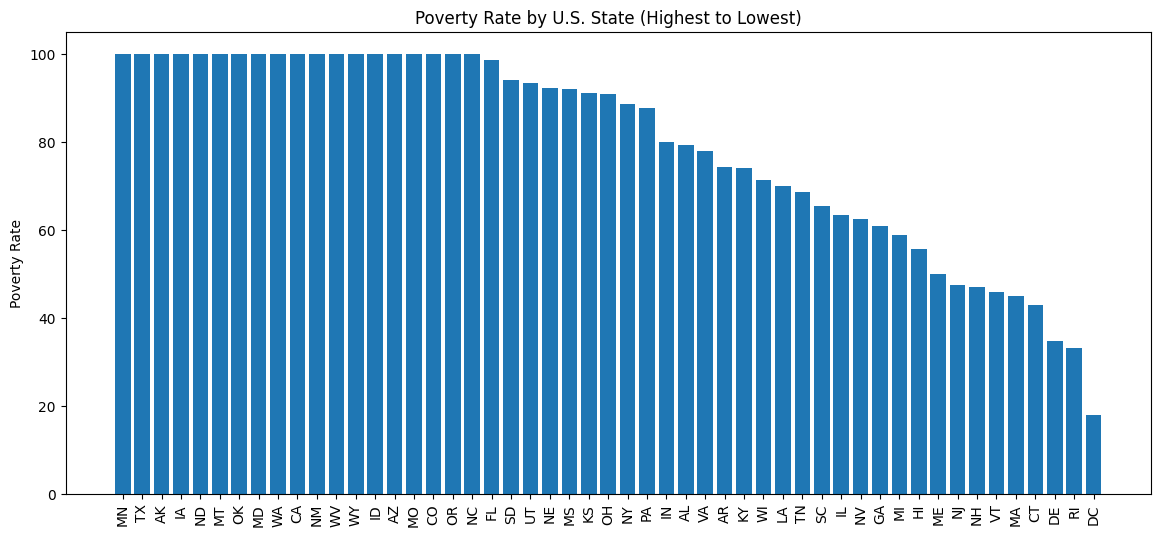

In [ ]:
# If u want to use px.bar directly then aggregate the poverty_rate since
# consists duplicates i.e., group by Geographic Area and find mean.
plt.figure(figsize=(14, 6))
plt.bar(df_pct_poverty_sorted['Geographic Area'], df_pct_poverty_sorted['poverty_rate'])
plt.xticks(rotation=90)
plt.title("Poverty Rate by U.S. State (Highest to Lowest)")
plt.ylabel("Poverty Rate")
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].replace("-", 0)

df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])
print(df_pct_completed_hs.head())

df_pct_completed_hs_sorted = df_pct_completed_hs.sort_values("percent_completed_hs")
print(df_pct_completed_hs_sorted)

  Geographic Area             City  percent_completed_hs
0              AL       Abanda CDP                 21.20
1              AL   Abbeville city                 69.10
2              AL  Adamsville city                 78.90
3              AL     Addison town                 81.40
4              AL       Akron town                 68.60
      Geographic Area               City  percent_completed_hs
16574              NM       Kingston CDP                  0.00
25616              TX          Netos CDP                  0.00
25606              TX   Narciso Pena CDP                  0.00
9928               KY     Dycusburg city                  0.00
3328               CA         Tuttle CDP                  0.00
...               ...                ...                   ...
24679              TX  Bonanza Hills CDP                100.00
24684              TX        Botines CDP                100.00
24689              TX     Boys Ranch CDP                100.00
29328              WY      Y

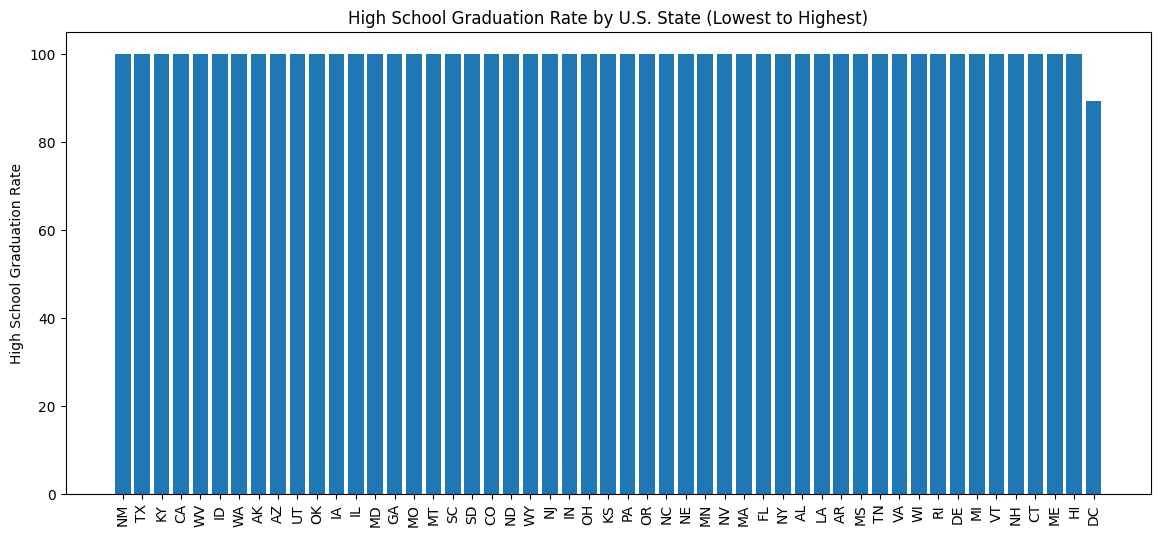

In [ ]:
plt.figure(figsize=(14, 6))
plt.bar(df_pct_completed_hs_sorted['Geographic Area'], df_pct_completed_hs_sorted['percent_completed_hs'])
plt.xticks(rotation=90)
plt.title("High School Graduation Rate by U.S. State (Lowest to Highest)")
plt.ylabel("High School Graduation Rate")
plt.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

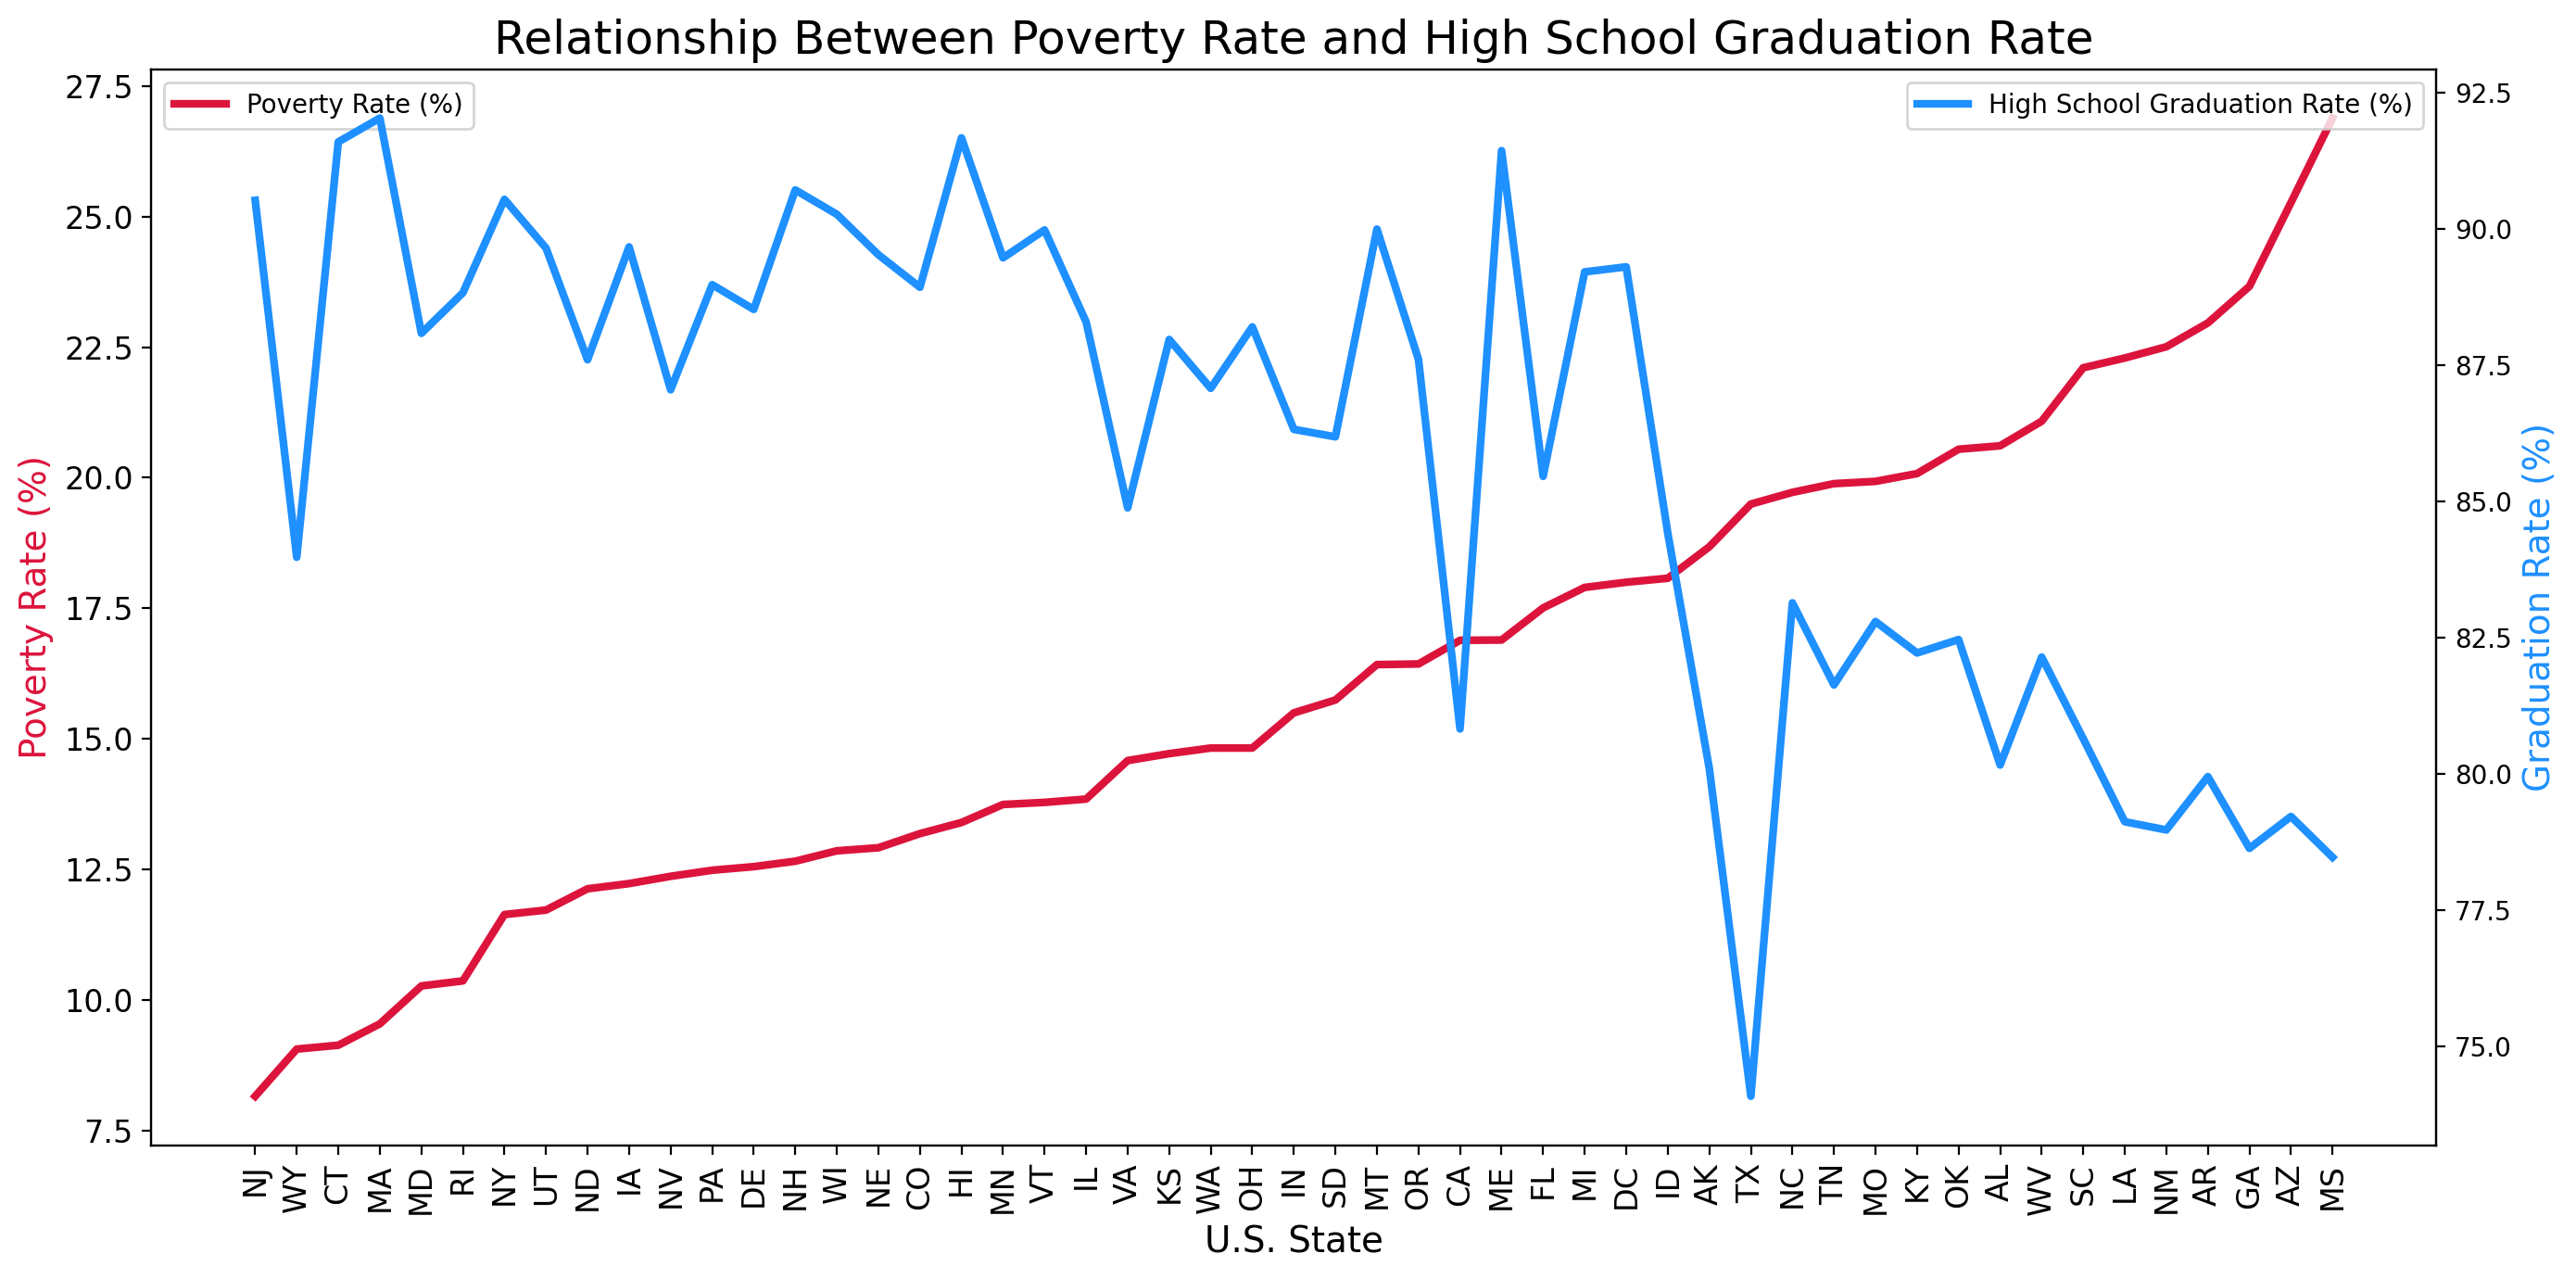

In [ ]:
# Take the average per state before merging
df_poverty_mean = df_pct_poverty_sorted.groupby('Geographic Area', as_index=False)['poverty_rate'].mean()
df_grad_mean = df_pct_completed_hs_sorted.groupby('Geographic Area', as_index=False)['percent_completed_hs'].mean()

# Merge the cleaned averages
# "on" tells pandas which column name to use as the common key when merging (joining) the two DataFrames.
df_merged = pd.merge(df_poverty_mean, df_grad_mean, on='Geographic Area').sort_values(by='poverty_rate')


plt.figure(figsize=(14, 7), dpi=200)
plt.title("Relationship Between Poverty Rate and High School Graduation Rate", fontsize=18)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(df_merged["Geographic Area"], df_merged["poverty_rate"],
         color="crimson", linewidth=3, label="Poverty Rate (%)")

ax2.plot(df_merged["Geographic Area"], df_merged["percent_completed_hs"],
         color="dodgerblue", linewidth=3, label="High School Graduation Rate (%)")

ax1.set_xlabel("U.S. State", fontsize=14)
ax1.set_ylabel("Poverty Rate (%)", color="crimson", fontsize=14)
ax2.set_ylabel("Graduation Rate (%)", color="dodgerblue", fontsize=14)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

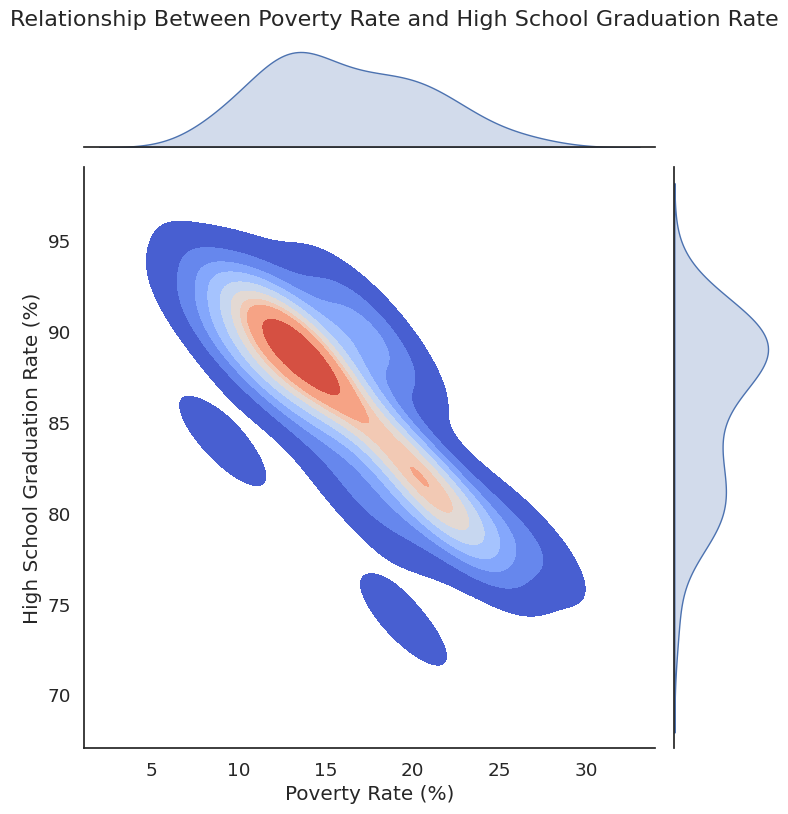

In [ ]:
sns.set(style="white", font_scale=1.2)

sns.jointplot(
    data=df_merged,
    x='poverty_rate',
    y='percent_completed_hs',
    kind='kde',
    fill=True,
    cmap="coolwarm",
    height=8,
)
plt.suptitle("Relationship Between Poverty Rate and High School Graduation Rate",
             fontsize=16, y=1.02)
plt.xlabel("Poverty Rate (%)")
plt.ylabel("High School Graduation Rate (%)")
plt.show()



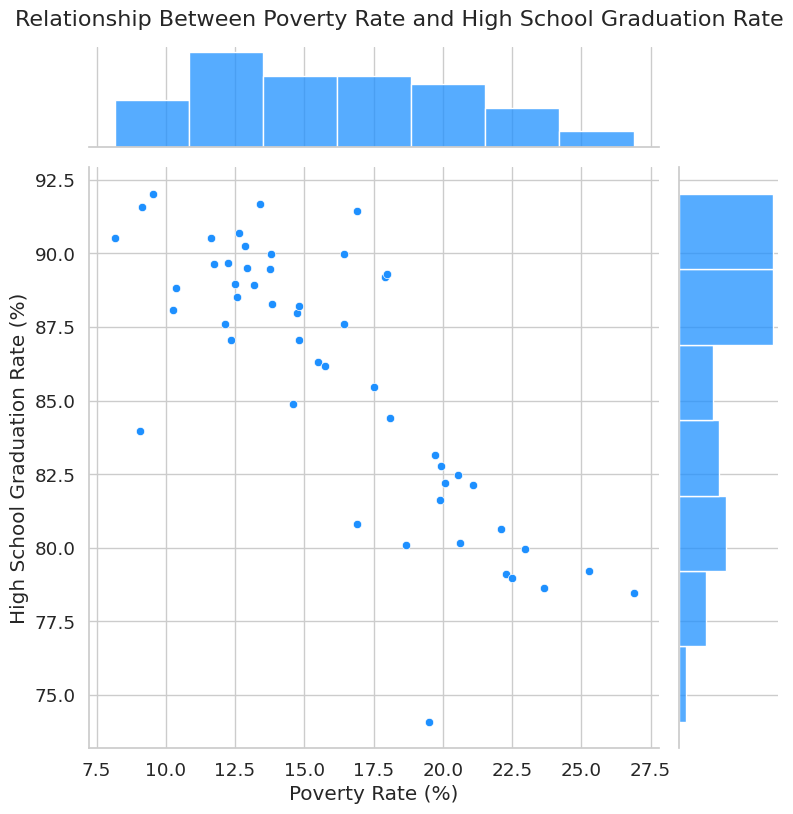

In [ ]:
sns.set(style="whitegrid", font_scale=1.2)

# Create a simple scatter jointplot
sns.jointplot(
    data=df_merged,
    x="poverty_rate",
    y="percent_completed_hs",
    kind="scatter",
    color="dodgerblue",
    height=8
)

plt.suptitle(
    "Relationship Between Poverty Rate and High School Graduation Rate",
    fontsize=16,
    y=1.02
)
plt.xlabel("Poverty Rate (%)")
plt.ylabel("High School Graduation Rate (%)")
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

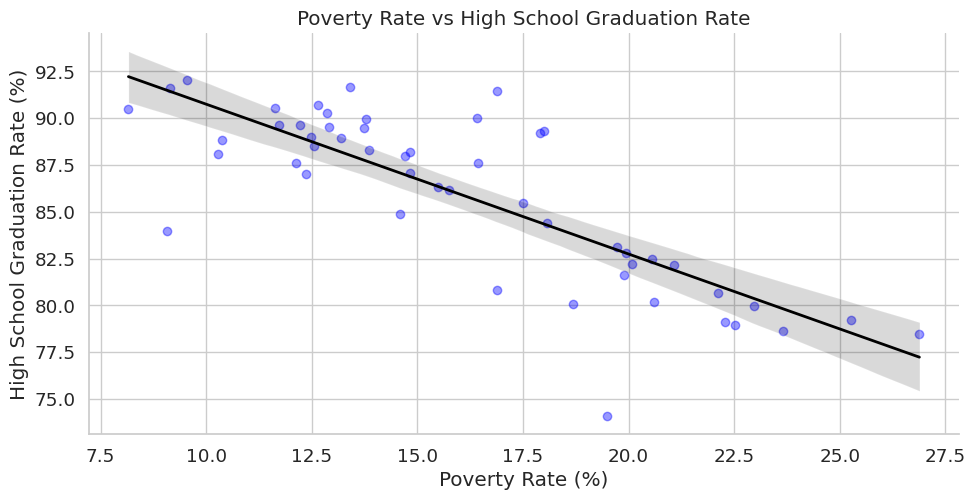

In [ ]:
with sns.axes_style("whitegrid"):
  sns.lmplot(data=df_merged,
             x='poverty_rate',
             y='percent_completed_hs',
             hue=None,
             aspect=2,
             scatter_kws = {'alpha': 0.4, 'color':'blue'},
             line_kws={'color': 'black', 'linewidth':2})

plt.title("Poverty Rate vs High School Graduation Rate")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("High School Graduation Rate (%)")
plt.show()

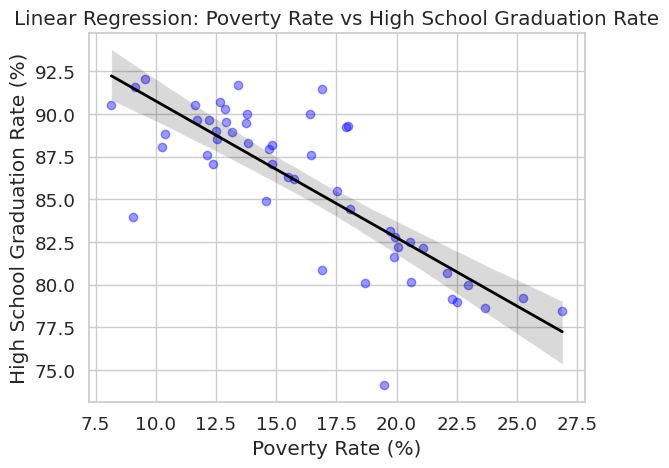

In [ ]:
with sns.axes_style("whitegrid"):
  sns.regplot(
    data=df_merged,
    x='poverty_rate',
    y='percent_completed_hs',
    scatter_kws={'alpha':0.4, 'color':'blue'},
    line_kws={'color':'black', 'linewidth':2}
)

plt.title("Linear Regression: Poverty Rate vs High School Graduation Rate")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("High School Graduation Rate (%)")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [98]:
# Define columns
cols = ['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']

# Clean values: remove %, (X), —, and convert to numeric
for col in cols:
    df_share_race_city[col] = (df_share_race_city[col].replace({'%':'', r'\(X\)':'', '-':'', '—':'', '': '0'}, regex=True))
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce').fillna(0)

# Calculate total for sorting
df_share_race_city['Total'] = df_share_race_city[cols].sum(axis=1)
df_share_race_city.sort_values(by='Total', ascending=False, inplace=True)

# Create a long-format DataFrame without using melt
df_long = pd.concat([df_share_race_city[['Geographic area', col]].rename(columns={col: 'Population (%)'}).assign(Race=col.replace('share_', '').replace('_', ' ').title())
    for col in cols
])

# Horizontal stacked bar chart
fig = px.bar(
    df_long,
    x='Population (%)',
    y='Geographic area',
    color='Race',
    orientation='h',
    title='Racial Makeup of Each US State',
    labels={'Population (%)': 'Population (%)', 'State': 'US State'}
)

fig.update_layout(
    barmode='stack',
    yaxis={'categoryorder': 'total ascending'},
    legend_title_text='Race'
)

fig.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [5]:
# Define race columns (make sure names match exactly)
race_cols = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

# Keep only those that actually exist
race_cols = [col for col in race_cols if col in df_share_race_city.columns]
print("Using columns:", race_cols)

# Convert them to numeric safely
for col in race_cols:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

# Compute mean of each race column
race_mean = df_share_race_city[race_cols].mean(numeric_only=True)

print("\nRace mean values:\n", race_mean)

# Convert Series → DataFrame
race_df = race_mean.reset_index()
race_df.columns = ['Race', 'Share']

# Create donut chart
fig = px.pie(
    race_df,
    names='Race',
    values='Share',
    hole=0.5,
    title='Average Racial Composition Across All Cities',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textinfo='percent+label')
fig.show()

Using columns: ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']

Race mean values:
 share_white             83.21
share_black              6.83
share_native_american    2.88
share_asian              1.54
share_hispanic           9.33
dtype: float64


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [96]:
# Count number of fatalities by gender
gender_counts = df_fatalities['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
print(gender_counts)

# Create bar chart
fig = px.bar(
    gender_counts,
    x='Gender',
    y='Count',
    color='Gender',
    text='Count',
    title='Total Number of Deaths by Gender',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)
fig.show()

  Gender  Count
0      M   2354
1      F    104


# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

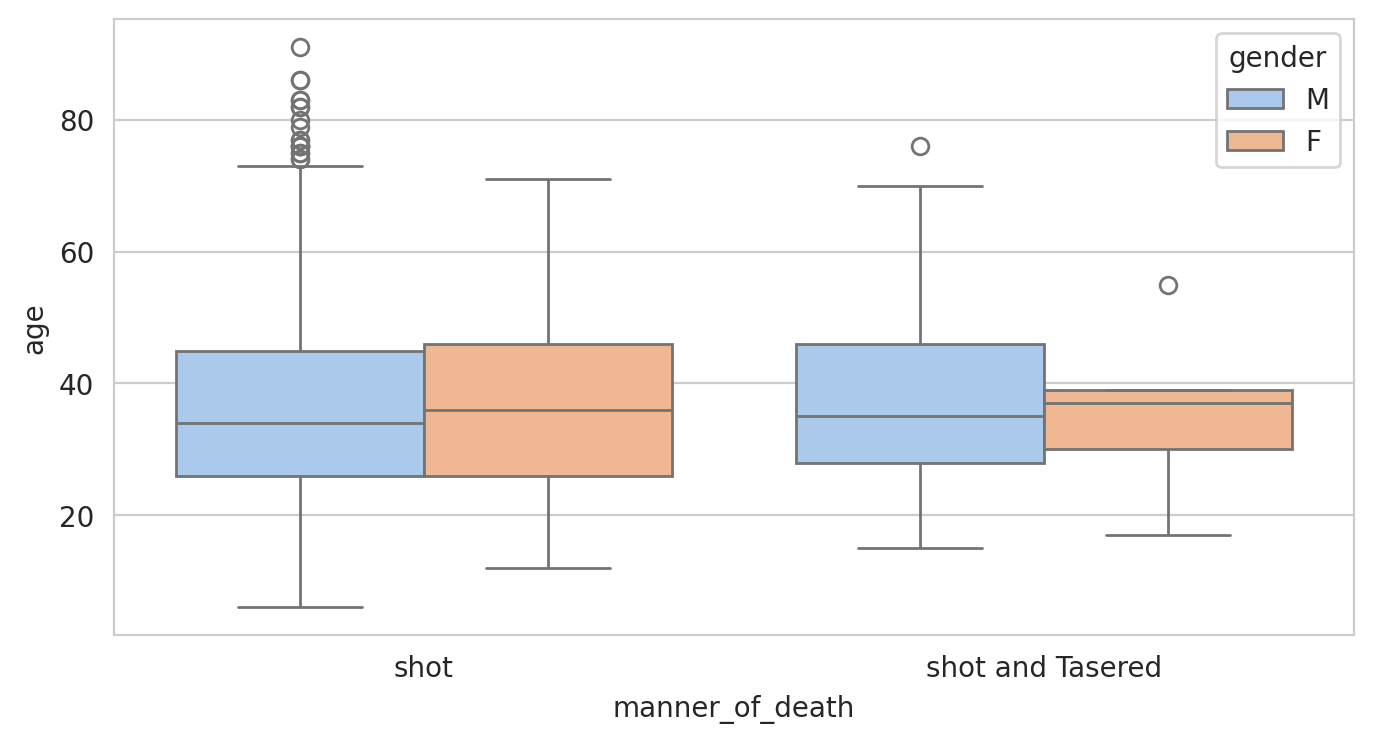

In [97]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.boxplot(data=df_fatalities,
              x='manner_of_death',
              y='age',
              hue='gender',
              palette='pastel')

plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [34]:
killing_counts = df_fatalities['armed'].value_counts().reset_index()
killing_counts.columns = ['armed', 'Count']
killing_counts['Count'] = pd.to_numeric(killing_counts['Count'], errors='coerce')
killing_counts['Percentage'] = (killing_counts['Count'] / killing_counts['Count'].sum()) * 100
print(killing_counts)

                      armed  Count  Percentage
0                       gun   1398       55.34
1                     knife    373       14.77
2                   vehicle    177        7.01
3                   unarmed    171        6.77
4              undetermined    117        4.63
..                      ...    ...         ...
63          air conditioner      1        0.04
64           pole and knife      1        0.04
65  baseball bat and bottle      1        0.04
66                fireworks      1        0.04
67                      pen      1        0.04

[68 rows x 3 columns]


In [35]:
# Create bar chart
fig = px.bar(
    killing_counts,
    x='Percentage',
    y='armed',
    color='armed',
    text=killing_counts['Percentage'].round(1).astype(str) + '%',
    title='Percentage of Police Killings by Weapon Type',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textposition='outside')
fig.update_layout(showlegend=False)
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [44]:
number_of_people_killed_under_25 = len(df_fatalities[df_fatalities['age'] < 25])
total_killed = len(df_fatalities)
under_25_percentage = (number_of_people_killed_under_25 / total_killed) * 100
print(f"{under_25_percentage:.2f}")

18.31


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

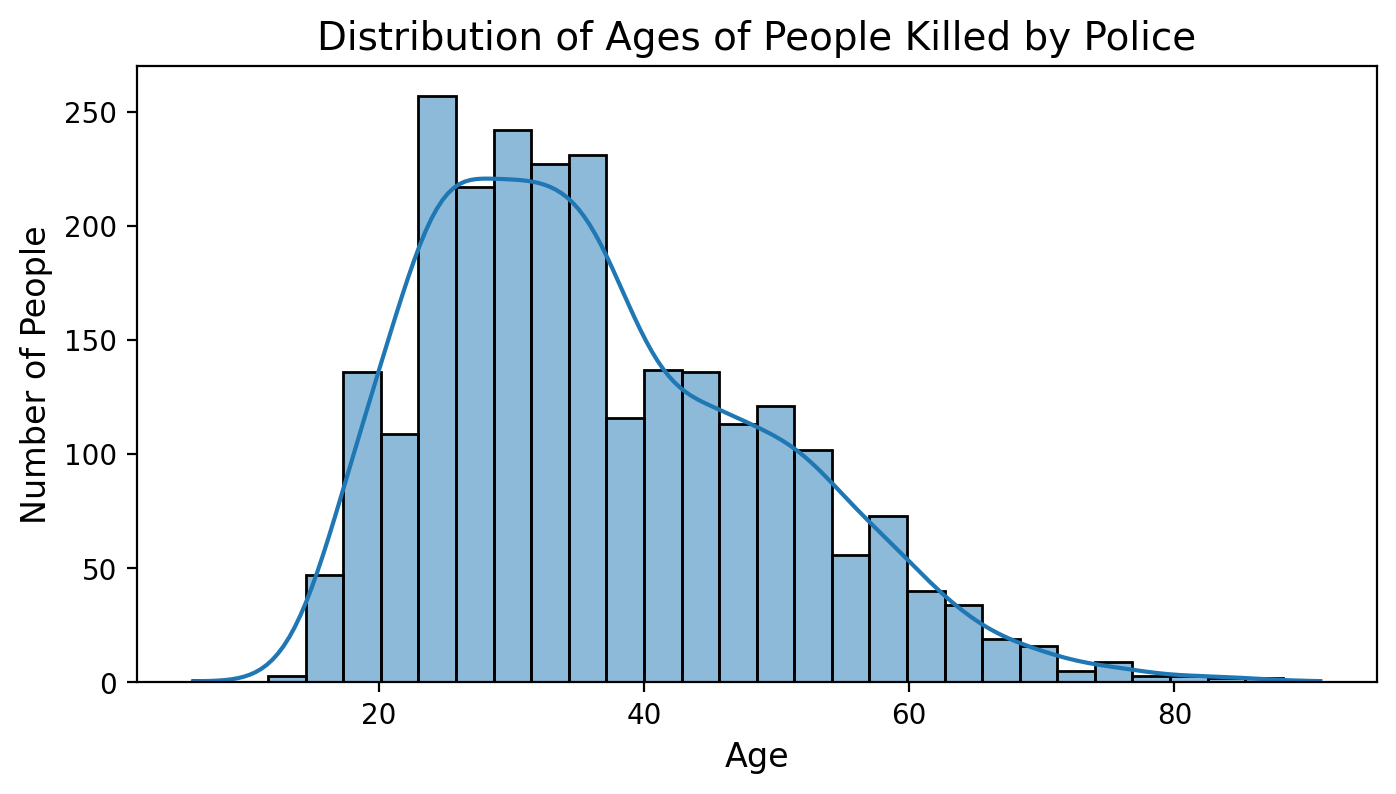

In [47]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=df_fatalities, x='age', bins=30, kde=True)
plt.title('Distribution of Ages of People Killed by Police', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

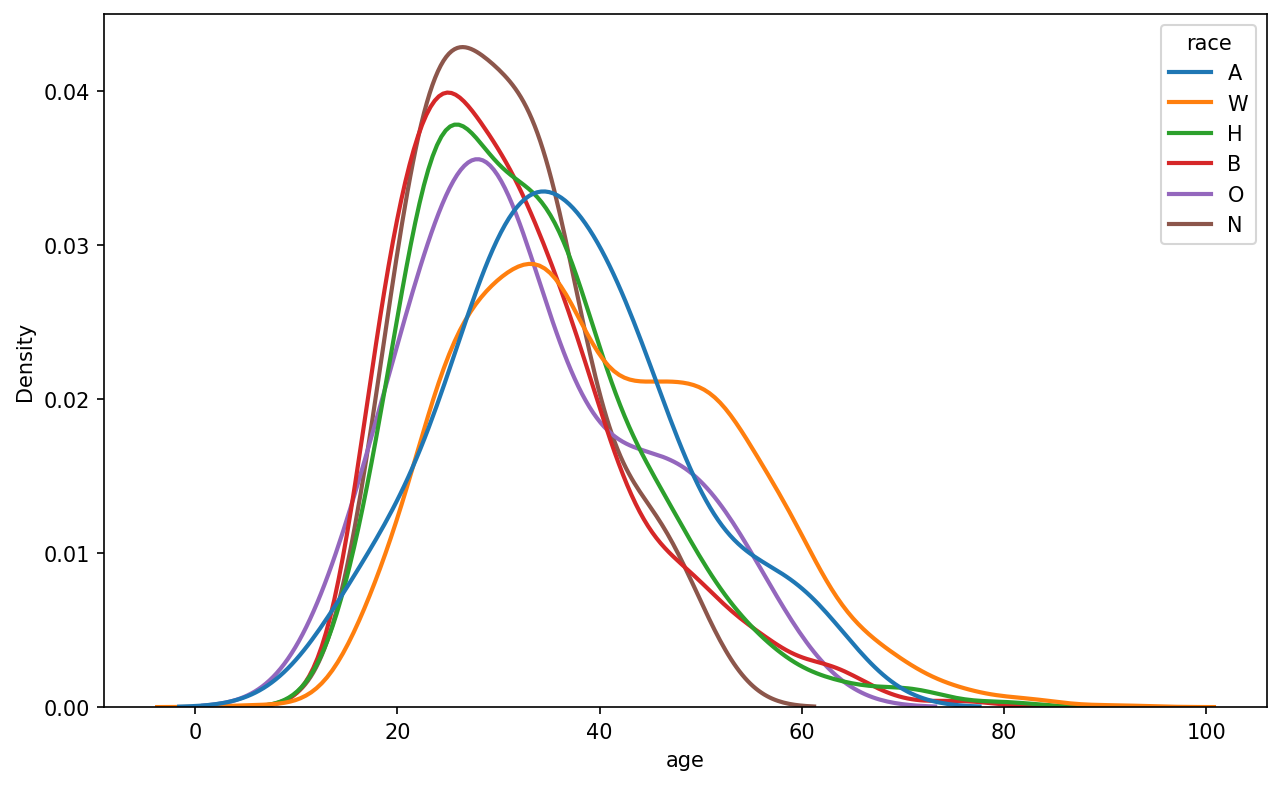

In [50]:
plt.figure(figsize=(10,6), dpi=150)
sns.kdeplot(
    data=df_fatalities,
    x='age',
    hue='race',          # separate line per race
    fill=False,          # keep lines only for clarity
    common_norm=False,   # don’t normalize together — keep real proportions
    linewidth=2
)
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [55]:
# Replace 'race' with your actual column name if different
race_counts = (df_fatalities['race'].value_counts().reset_index())
race_counts.columns = ['Race', 'Count']
print(race_counts)

# Plotly bar chart
fig = px.bar(
    race_counts,
    x='Race',
    y='Count',
    text='Count',
    color='Race',
    title='Total Number of People Killed by Race',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title='Race',
    yaxis_title='Number of People Killed',
    showlegend=False
)
fig.show()


  Race  Count
0    W   1192
1    B    609
2    H    413
3    A     38
4    N     31
5    O     28


# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [68]:
mental_illness_count = df_fatalities['signs_of_mental_illness'].value_counts()
print(mental_illness_count)
people_killed = (mental_illness_count.get(True, 0) / mental_illness_count.sum()) * 100
print(f"{people_killed:.2f}")

signs_of_mental_illness
False    1839
True      619
Name: count, dtype: int64
25.18


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [80]:
killings_by_city = df_fatalities['city'].value_counts().reset_index()
killings_by_city.columns = ['City', 'Count']
print(killings_by_city)

top_10_cities = killings_by_city.head(10)
print(top_10_cities)

             City  Count
0     Los Angeles     37
1         Phoenix     30
2         Houston     26
3         Chicago     25
4       Las Vegas     19
...           ...    ...
1376        Plano      1
1377      Trosper      1
1378     Goodyear      1
1379     Culpeper      1
1380         Clay      1

[1381 rows x 2 columns]
          City  Count
0  Los Angeles     37
1      Phoenix     30
2      Houston     26
3      Chicago     25
4    Las Vegas     19
5     Columbus     18
6       Austin     18
7  San Antonio     17
8        Miami     17
9    St. Louis     15


In [81]:
fig = px.bar(
    top_10_cities,  # sort for clean horizontal bars
    x='Count',
    y='City',
    orientation='h',
    text='Count',
    color='City',
    title='Top 10 Cities with the Most Police Killings (Ranked)',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_traces(textposition='outside')
fig.update_layout(
    showlegend=False,
    yaxis_title='City',
    xaxis_title='Number of People Killed',
    yaxis={'categoryorder': 'total ascending'}
)
fig.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [86]:
# Filter fatalities to only include top 10 cities
top_cities_fatalities = df_fatalities[df_fatalities['city'].isin(top_10_cities['City'])]
# print(top_cities_fatalities)

# Count killings by race in each top city
killings_by_race_city = top_cities_fatalities.groupby(['city', 'race']).size().reset_index(name='Killings')
print(killings_by_race_city)

# Get total killings per city for rate calculation
total_killings_per_city  = top_cities_fatalities.groupby('city').size().reset_index(name='Total_Killings')
print(total_killings_per_city)

# Merge to calculate killing rate per race
killings_by_race_city = killings_by_race_city.merge(total_killings_per_city, on='city')
print(killings_by_race_city)

killings_by_race_city['Killing_Rate'] = killings_by_race_city['Killings'] / killings_by_race_city['Total_Killings']
print(killings_by_race_city)



           city race  Killings
0        Austin    B         3
1        Austin    H         2
2        Austin    W        13
3       Chicago    B        21
4       Chicago    H         1
5       Chicago    W         2
6      Columbus    B        10
7      Columbus    O         1
8      Columbus    W         6
9       Houston    A         1
10      Houston    B        15
11      Houston    H         5
12      Houston    N         1
13      Houston    W         3
14    Las Vegas    B         3
15    Las Vegas    H         5
16    Las Vegas    W         9
17  Los Angeles    A         1
18  Los Angeles    B        10
19  Los Angeles    H        18
20  Los Angeles    W         6
21        Miami    B         8
22        Miami    H         6
23        Miami    W         3
24      Phoenix    B         2
25      Phoenix    H        11
26      Phoenix    N         3
27      Phoenix    W        12
28  San Antonio    B         3
29  San Antonio    H        12
30  San Antonio    W         2
31    St

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [87]:
state_counts = df_fatalities['state'].value_counts().reset_index()
state_counts.columns = ['state', 'killings']
print(state_counts)

   state  killings
0     CA       404
1     TX       215
2     FL       148
3     AZ       113
4     OH        76
5     OK        76
6     CO        70
7     NC        68
8     GA        68
9     MO        64
10    IL        61
11    WA        60
12    TN        59
13    LA        54
14    PA        51
15    NM        49
16    AL        47
17    VA        46
18    NY        44
19    WI        43
20    SC        43
21    KY        42
22    IN        42
23    NV        39
24    MD        38
25    OR        37
26    MI        37
27    NJ        34
28    MN        32
29    AR        26
30    WV        26
31    KS        24
32    MS        23
33    UT        23
34    MA        22
35    AK        15
36    NE        15
37    ID        15
38    ME        13
39    IA        12
40    MT        11
41    HI        11
42    DC        11
43    SD        10
44    CT         9
45    WY         8
46    DE         8
47    NH         7
48    ND         4
49    VT         3
50    RI         2


In [88]:
state_to_abbrev = {
 "ALABAMA":"AL","ALASKA":"AK","ARIZONA":"AZ","ARKANSAS":"AR","CALIFORNIA":"CA","COLORADO":"CO",
 "CONNECTICUT":"CT","DELAWARE":"DE","FLORIDA":"FL","GEORGIA":"GA","HAWAII":"HI","IDAHO":"ID",
 "ILLINOIS":"IL","INDIANA":"IN","IOWA":"IA","KANSAS":"KS","KENTUCKY":"KY","LOUISIANA":"LA",
 "MAINE":"ME","MARYLAND":"MD","MASSACHUSETTS":"MA","MICHIGAN":"MI","MINNESOTA":"MN","MISSISSIPPI":"MS",
 "MISSOURI":"MO","MONTANA":"MT","NEBRASKA":"NE","NEVADA":"NV","NEW HAMPSHIRE":"NH","NEW JERSEY":"NJ",
 "NEW MEXICO":"NM","NEW YORK":"NY","NORTH CAROLINA":"NC","NORTH DAKOTA":"ND","OHIO":"OH","OKLAHOMA":"OK",
 "OREGON":"OR","PENNSYLVANIA":"PA","RHODE ISLAND":"RI","SOUTH CAROLINA":"SC","SOUTH DAKOTA":"SD",
 "TENNESSEE":"TN","TEXAS":"TX","UTAH":"UT","VERMONT":"VT","VIRGINIA":"VA","WASHINGTON":"WA",
 "WEST VIRGINIA":"WV","WISCONSIN":"WI","WYOMING":"WY","DISTRICT OF COLUMBIA":"DC"
}

sc = state_counts.copy()
# if values look like names (len>2) map them to abbreviations
if sc['state'].str.len().max() > 2:
    sc['state_code'] = sc['state'].str.strip().str.upper().map(state_to_abbrev)
else:
    sc['state_code'] = sc['state']

sc = sc.dropna(subset=['state_code'])

# choropleth
fig = px.choropleth(
    sc,
    locations='state_code',
    locationmode="USA-states",
    color='killings',
    scope="usa",
    labels={'killings':'Police Killings'},
    title="Police Killings by US State (from provided CSV)"
)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

# bar chart of the top 15 states
top_bar = state_counts.head(15)
bar_fig = px.bar(top_bar, x=top_bar.iloc[:,0], y='killings', title="Top 15 states by police killings")
bar_fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [91]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], errors='coerce')
df_fatalities['year'] = df_fatalities['date'].dt.year

print(df_fatalities)

        id                name       date   manner_of_death       armed   age  \
0        3          Tim Elliot 2015-02-01              shot         gun 53.00   
1        4    Lewis Lee Lembke 2015-02-01              shot         gun 47.00   
2        5  John Paul Quintero 2015-03-01  shot and Tasered     unarmed 23.00   
3        8     Matthew Hoffman 2015-04-01              shot  toy weapon 32.00   
4        9   Michael Rodriguez 2015-04-01              shot    nail gun 39.00   
...    ...                 ...        ...               ...         ...   ...   
2529  2819    Brian J. Skinner 2017-07-28              shot       knife 32.00   
2530  2822    Rodney E. Jacobs 2017-07-28              shot         gun 31.00   
2532  2818  Dennis W. Robinson 2017-07-29              shot         gun 48.00   
2533  2817       Isaiah Tucker 2017-07-31              shot     vehicle 28.00   
2534  2815        Dwayne Jeune 2017-07-31              shot       knife 32.00   

     gender race           

In [94]:
killings_by_year = df_fatalities.groupby('year').size().reset_index(name='killings')
print(killings_by_year)

   year  killings
0  2015       980
1  2016       937
2  2017       541


In [95]:
fig = px.line(
    killings_by_year,
    x='year',
    y='killings',
    markers=True,
    title='Number of Police Killings Over Time (US)',
    labels={'year': 'Year', 'killings': 'Number of Killings'}
)
fig.update_layout(xaxis=dict(dtick=1))
fig.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).